In [13]:
!pip install --pre pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\mille\\anaconda3\\envs\\mlenv\\lib\\site-packages\\~sutil\\_psutil_windows.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
  Using cached pyod-1.0.4-py3-none-any.whl
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.1-cp37-cp37m-win_amd64.whl size=45784 sha256=392788151f295199fdd719e1590d28f9ea3252d133bccd6c4412a0e147b77d72
  Stored in directory: c:\users\mille\appdata\local\pip\cache\wheels\4a\80\6b\ededd1fe4bf3469a6c6e1e3dac54a6d1416151c463d223081d
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=944af5e0366ecaf5e6381b211ea37e3e5f4425d06facfa6c5206cbeb755ea49a
  Stored in directory: c:\users\mille\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built plotly-resampler retrying
  Attempting uninstall: psutil
    Found existing installation: psutil 5.8.0
    Uninstalling psutil-5.8.0:
      Successfully uninstalled psutil-5.8.0


In [2]:
# Import dependencies
import pandas as pd
import pycaret
from pycaret.classification import *

In [3]:
# Read and display dataframe
df = pd.read_csv('../Desktop/Testsource/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Separate data into training and testing sets
data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (228312, 22)
Unseen Data For Predictions: (25368, 22)


In [5]:
# 
exp_reg101 = setup(data = df,
                   target = 'MentHlth') 
# ignore_features = ['listing image','listing url','full address','zipcode']

,Description,Value
0,session_id,6534
1,Target,MentHlth
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(253680, 22)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
# Determing optimal machine learning model
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6961,0.7115,0.0399,0.5069,0.5850,0.0757,0.1378,128.7840
ridge,Ridge Classifier,0.6960,0.0000,0.0366,0.5044,0.5795,0.0440,0.1088,0.1490
gbc,Gradient Boosting Classifier,0.6960,0.7296,0.0423,0.5125,0.5844,0.0715,0.1338,368.2950
dummy,Dummy Classifier,0.6926,0.5000,0.0323,0.4796,0.5668,0.0000,0.0000,0.0970
ada,Ada Boost Classifier,0.6896,0.6245,0.0381,0.5053,0.5810,0.0650,0.1140,6.5370
lda,Linear Discriminant Analysis,0.6858,0.7102,0.0445,0.5109,0.5855,0.1159,0.1555,1.3190
knn,K Neighbors Classifier,0.6775,0.6229,0.0384,0.5218,0.5803,0.0708,0.1007,21.6570
svm,SVM - Linear Kernel,0.6654,0.0000,0.0390,0.5170,0.5709,0.0689,0.1000,9.4730
lightgbm,Light Gradient Boosting Machine,0.6153,0.6395,0.0438,0.5198,0.5594,0.0656,0.0712,28.1180
dt,Decision Tree Classifier,0.5229,0.5624,0.0454,0.5365,0.5296,0.0886,0.0886,0.6070


In [8]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6757,0.6773,0.0389,0.5188,0.5794,0.0682,0.0961


In [9]:
tuned_gbr = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6925,0.6866,0.0323,0.4796,0.5667,0.0000,0.0000
1,0.6925,0.6821,0.0323,0.4796,0.5667,0.0000,0.0000
2,0.6925,0.6857,0.0323,0.4796,0.5667,0.0000,0.0000
3,0.6925,0.6839,0.0323,0.4796,0.5667,0.0000,0.0000
4,0.6925,0.6847,0.0323,0.4796,0.5667,0.0000,0.0000
5,0.6926,0.6845,0.0323,0.4797,0.5668,0.0000,0.0000
6,0.6926,0.6833,0.0323,0.4797,0.5668,0.0000,0.0000
7,0.6926,0.6863,0.0323,0.4797,0.5668,0.0000,0.0000
8,0.6926,0.6898,0.0323,0.4797,0.5668,0.0000,0.0000


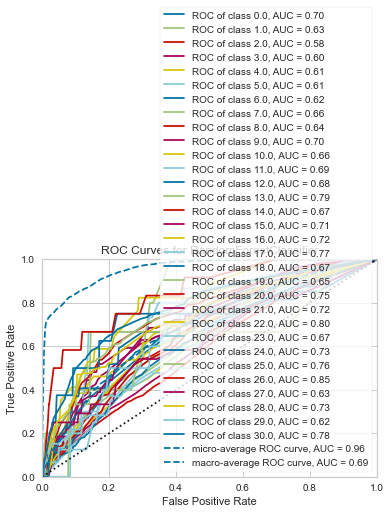

In [10]:
plot_model(tuned_gbr)

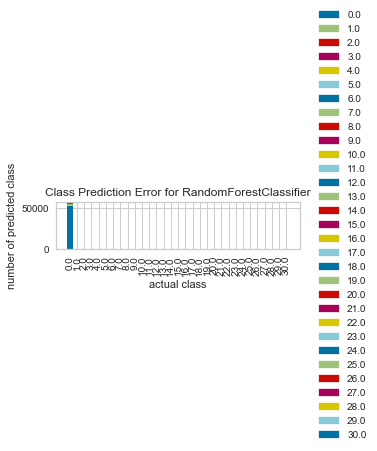

In [11]:
plot_model(tuned_gbr, plot = 'error')

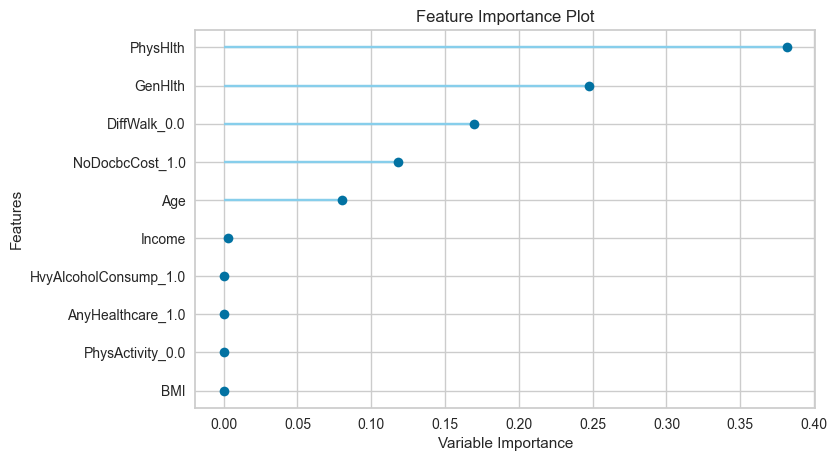

In [12]:
plot_model(tuned_gbr, plot='feature')

In [13]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
unseen_predictions = predict_model(tuned_gbr, data=data_unseen)
unseen_predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6949,0,0.0323,0.4829,0.5698,0.0000,0.0000


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Label,Score
0,0.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,2.0,20.0,0.0,0.0,0.0,9.0,6.0,8.0,0,0.7344
1,1.0,1.0,1.0,1.0,38.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,8.0,4.0,3.0,0,0.7249
2,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,0.0,0.0,5.0,5.0,8.0,0,0.6558
3,0.0,1.0,0.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,1.0,6.0,5.0,6.0,0,0.7245
4,1.0,1.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,30.0,0.0,1.0,9.0,4.0,6.0,0,0.6296
